In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Outcomes of hypothesis tests

In standard statistical hypothesis testing there are two real possibilities -- the null hypothesis is true or the alternative hypothesis is true. When you carry out a hypothesis test, there are two possible test outcomes --  you reject the null hypothesis or you fail to reject the null hypothesis.  It is typical to represent the different combinations of the reality / statistical tests in a table like the following:


|            | do not reject $H_0$           | reject $H_0$                   |
|------------|:-----------------------------:|:------------------------------:|
|$H_0$ true  | okay                          | Type 1 error (false positive), $\alpha$ |
|$H_A$ true  | Type 2 error (false negative), $\beta$ | okay                           |

When we specify a significance threshold, $\alpha$, for hypothesis testing, this controls the Type I error (false positive rate) of our test.  The false negative rate is often referred to as $\beta$.  In general, there is a tradeoff between the false positive and false negative rate -- the lower the false positive rate the higher the false negative rate, and vice versa.

### Statistical Power

The power of a statistical test is defined as:
$$
\mbox{Power}\ = P(\mbox{reject}\ H_0\ |\ H_A \mbox{is true})
$$

In words, this is the probability that the null hypothesis is rejected, conditional on the alternative hypothesis being true.

If $\beta$ is the false negative rate, then 
$$
\mbox{Power}\ = 1 - \beta
$$

## Exploring statistical power for one-sample t-tests

We'll use a one-sample t-tests to illustrate the concept of statistical power. For this example, we'll explore the power of the t-test to distinguish between the null hypothesis that the data of interest are $H_0 \sim N(\mu=0,\sigma=1)$ and a true underlying distribution $H_A \sim N(\mu \neq 0, \sigma=1)$.

First we'll hold the effect size ( $|\mu_{H_A} - \mu_{H_0}|$ ) constant and vary sample size, and then we'll explore the effect of both sample size and effect size on power.


### Population distributions, $H_0$ vs $H_A$

Below are the population distributions under the null hypothesis (red) compared to the population distribution for the true underlying distribution (black).

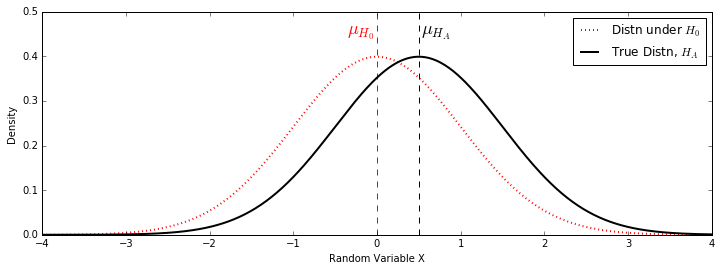

In [3]:
muH0, muHA = 0, 0.5
sigma = 1

fig, ax1 = plt.subplots(figsize=(12,4))
x = np.linspace(-4, 4, 500)

ax1.plot(x, stats.norm.pdf(x, loc=muH0, scale=sigma), color='red', 
         linestyle='dotted', linewidth=2, label='Distn under $H_0$')
ax1.plot(x, stats.norm.pdf(x, loc=muHA, scale=sigma), color='black', 
         linewidth=2, label='True Distn, $H_A$')

offset = 0.2
ax1.text(muH0 - offset, 0.45, "$\mu_{H_0}$", 
         horizontalalignment='center', color='red', fontsize=18)
ax1.text(muHA + offset, 0.45, "$\mu_{H_A}$", 
         horizontalalignment='center', color='black', fontsize=18)

ax1.set_ylim(0, 0.5)
ax1.vlines(muH0,0,0.5,color='red', linestyle='dashed')
ax1.vlines(muHA,0,0.5,color='black', linestyle='dashed')
ax1.legend(loc='best')
ax1.set_xlabel("Random Variable X")
ax1.set_ylabel("Density")
#fig.savefig("fig-H0distn-vs-TrueDistn.pdf")
pass

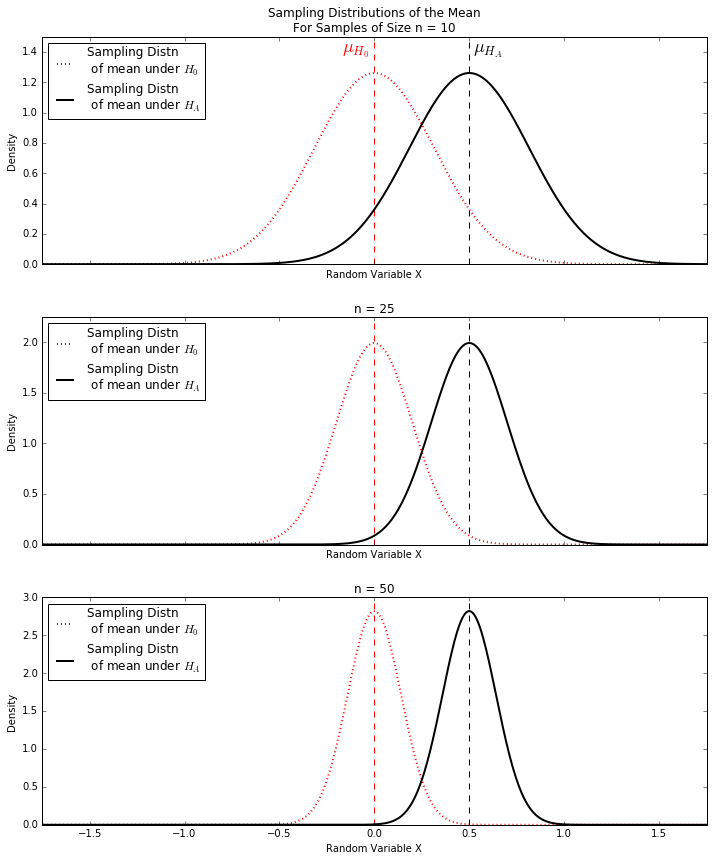

In [4]:
n1, n2, n3 = 10, 25, 50

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10,12), sharex=True)

x = np.linspace(-2, 2, 500)
ax1.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n1)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax1.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n1)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

offset = 0.1

ax1.text(muH0 - offset, 1.4, "$\mu_{H_0}$", 
         horizontalalignment='center', color='red', fontsize=18)
ax1.text(muHA + offset, 1.4, "$\mu_{H_A}$", 
         horizontalalignment='center', color='black', fontsize=18)
ax1.set_ylim(0, 1.5)
ax1.set_xlim(-1.75,1.75)
ax1.vlines(0,0,1.5,color='red', linestyle='dashed')
ax1.vlines(0.5,0,1.5,color='black', linestyle='dashed')
ax1.legend(loc='upper left')
ax1.set_xlabel("Random Variable X")
ax1.set_ylabel("Density")
ax1.set_title("""Sampling Distributions of the Mean
For Samples of Size n = {}""".format(n1))

ax2.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n2)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax2.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n2)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

ax2.set_ylim(0, 2.25)
ax2.vlines(0,0,2.25,color='red', linestyle='dashed')
ax2.vlines(0.5,0,2.25,color='black', linestyle='dashed')
ax2.legend(loc='upper left')
ax2.set_xlabel("Random Variable X")
ax2.set_ylabel("Density")
ax2.set_title("""n = {}""".format(n2))


ax3.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n3)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax3.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n3)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

ax3.set_ylim(0, 3)
ax3.vlines(0,0,3,color='red', linestyle='dashed')
ax3.vlines(0.5,0,3,color='black', linestyle='dashed')
ax3.legend(loc='upper left')
ax3.set_xlabel("Random Variable X")
ax3.set_ylabel("Density")
ax3.set_title("""n = {}""".format(n3))

fig.tight_layout(h_pad=2.5)
#fig.savefig("fig-H0sampling-vs-Truesampling.pdf")
pass

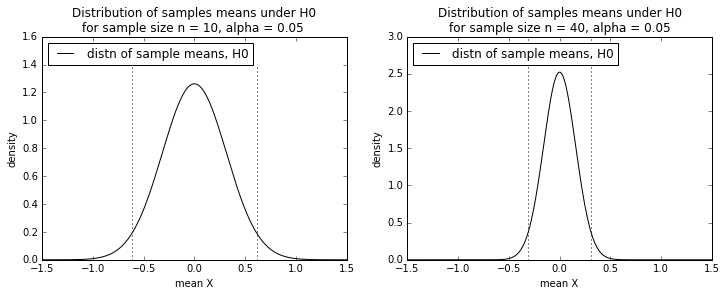

In [5]:
n0, n1 = 10, 40
mu_null = 0
mu_alt = 0.5
sigma = 1
SE0 = sigma/np.sqrt(n0)
SE1 = sigma/np.sqrt(n1)

samplingdist_null0 = stats.norm(loc=mu_null, scale=SE0)
samplingdist_null1 = stats.norm(loc=mu_null, scale=SE1)

alpha = 0.05
null_left_cutoff0  = mu_null + samplingdist_null0.ppf(alpha/2)
null_right_cutoff0  = mu_null + samplingdist_null0.ppf(1-(alpha/2))

null_left_cutoff1  = mu_null + samplingdist_null1.ppf(alpha/2)
null_right_cutoff1  = mu_null + samplingdist_null1.ppf(1-(alpha/2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True)
x = np.linspace(-1.5,1.5,250)

ax1.plot(x, samplingdist_null0.pdf(x), color='black', label="distn of sample means, H0")
ax1.set_xlabel("mean X")
ax1.set_ylabel("density")
ax1.set_title("""Distribution of samples means under H0
for sample size n = {}, alpha = {} """.format(n0,alpha))

ax1.legend(loc='upper left')
min_y, max_y0 = ax1.get_ylim()
ax1.vlines(null_left_cutoff0, 0, max_y0, linestyle='dotted')
ax1.vlines(null_right_cutoff0, 0, max_y0, linestyle='dotted')

ax2.plot(x, samplingdist_null1.pdf(x), color='black', label="distn of sample means, H0")
ax2.set_xlabel("mean X")
ax2.set_ylabel("density")
ax2.set_title("""Distribution of samples means under H0
for sample size n = {}, alpha = {}""".format(n1,alpha))

ax2.legend(loc='upper left')
min_y, max_y1 = ax2.get_ylim()
ax2.vlines(null_left_cutoff1, 0, max_y1, linestyle='dotted')
ax2.vlines(null_right_cutoff1, 0, max_y1, linestyle='dotted')

pass

For sample size n = 10
the percent of simulations where we failed to reject H0 is: 61.7
and hence, the percent of simulations where we correctly rejected H0 is: 38.3


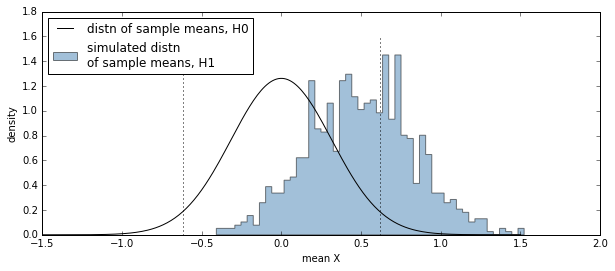

In [6]:
n = 10

mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)

samplingdist_null = stats.norm(loc=mu_null, scale=SE)

dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []


for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    sample_means.append(np.mean(sample))
    
samples_mean = np.array(sample_means)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-1.5,1.5,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="distn of sample means, H0")


ax.hist(sample_means, bins=50, normed=True, label="simulated distn\nof sample means, H1",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='upper left')


failed_to_reject_H0 = np.logical_and(sample_means > null_left_cutoff, 
                                    sample_means < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

#fig.savefig("fig-powersim-n10.pdf")

pass

For sample size n = 25
the percent of simulations where we failed to reject H0 is: 30.4
and hence, the percent of simulations where we correctly rejected H0 is: 69.6


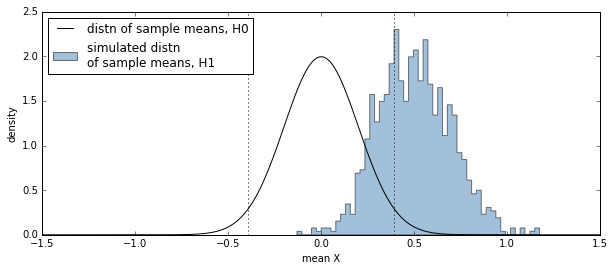

In [7]:
n = 25

mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)

samplingdist_null = stats.norm(loc=mu_null, scale=SE)

dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []


for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    sample_means.append(np.mean(sample))
    
samples_mean = np.array(sample_means)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-1.5,1.5,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="distn of sample means, H0")


ax.hist(sample_means, bins=50, normed=True, label="simulated distn\nof sample means, H1",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='best')


failed_to_reject_H0 = np.logical_and(sample_means > null_left_cutoff, 
                                    sample_means < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

#fig.savefig("fig-powersim-n25.pdf")
pass

For sample size n = 50
the percent of simulations where we failed to reject H0 is: 4.7
and hence, the percent of simulations where we correctly rejected H0 is: 95.3


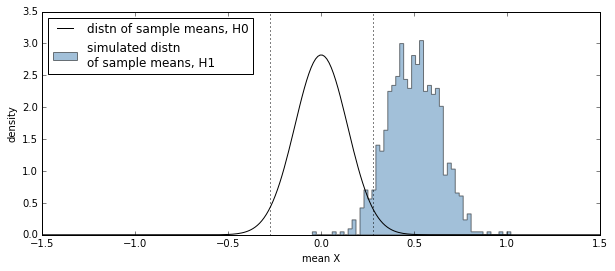

In [8]:
n = 50

mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)

samplingdist_null = stats.norm(loc=mu_null, scale=SE)

dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []


for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    sample_means.append(np.mean(sample))
    
samples_mean = np.array(sample_means)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-1.5,1.5,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="distn of sample means, H0")



ax.hist(sample_means, bins=50, normed=True, label="simulated distn\nof sample means, H1",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='best')


failed_to_reject_H0 = np.logical_and(sample_means > null_left_cutoff, 
                                    sample_means < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

#fig.savefig("fig-powersim-n50.pdf")
pass

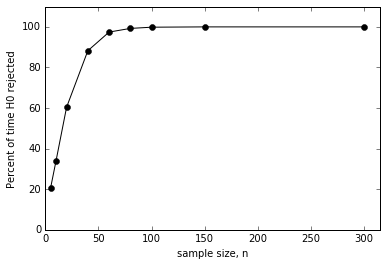

In [9]:
mu_null = 0
mu_alt = 0.5
sigma = 1

nsims = 2000
sizes = [5, 10, 20, 40, 60, 80, 100, 150, 300]

alpha = 0.05
SEs = [sigma/np.sqrt(i) for i in sizes]
left_cutoffs = [mu_null + stats.norm.ppf(alpha/2, loc=mu_null, scale=i)
               for i in SEs]
right_cutoffs = [mu_null + stats.norm.ppf((1-alpha/2), loc=mu_null, scale=i)
               for i in SEs]

dist_alt = stats.norm(loc=mu_alt, scale=sigma)
samples = [dist_alt.rvs(size=(i, nsims)) for i in sizes]
sample_means = [np.mean(i, axis=0) for i in samples]

failed_to_reject_H0 = [np.logical_and(i > left, i < right) for (i, left, right) 
                       in zip(sample_means, left_cutoffs, right_cutoffs)]

frac_failed_to_reject_H0 = [np.count_nonzero(i)/nsims for i in failed_to_reject_H0]

correctly_rejected_H0 = [(1-i)*100 for i in frac_failed_to_reject_H0]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(sizes, correctly_rejected_H0, marker='o', color='black')
ax.set_xlabel("sample size, n")
ax.set_ylabel("Percent of time H0 rejected")
ax.set_ylim(0,110)
ax.set_xlim(0, max(sizes)*1.05)

#fig.savefig('fig-powercurve-diff05.pdf')
pass

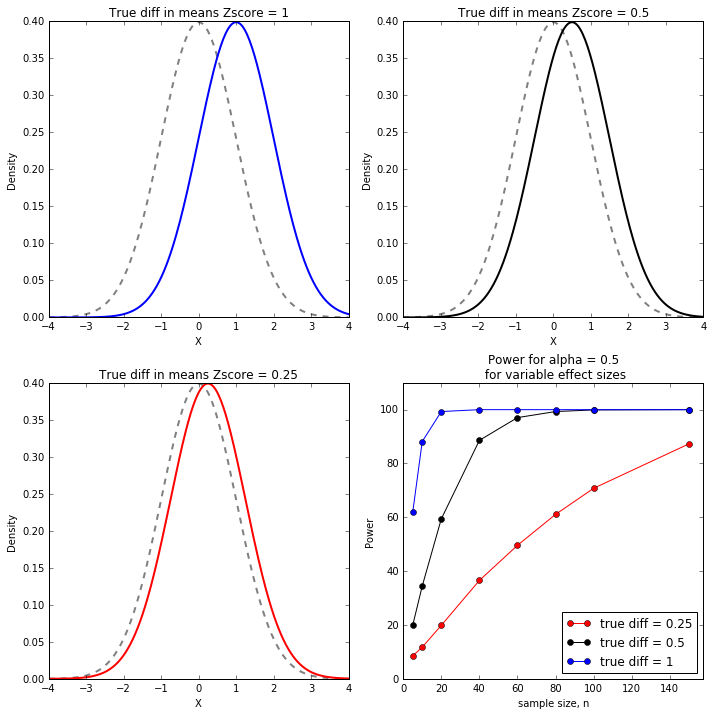

In [10]:

def power_sim(mu_null, mu_alt, sigma, alpha=0.05,
             ssizes = [5, 10, 20, 40, 60, 80, 100, 150],
             nsims = 2000):

    SEs = [sigma/np.sqrt(i) for i in ssizes]
    left_cutoffs = [mu_null + stats.norm.ppf(alpha/2, loc=mu_null, scale=i)
               for i in SEs]
    right_cutoffs = [mu_null + stats.norm.ppf((1-alpha/2), loc=mu_null, scale=i)
               for i in SEs]

    dist_alt = stats.norm(loc=mu_alt, scale=sigma)
    samples = [dist_alt.rvs(size=(i, nsims)) for i in ssizes]
    sample_means = [np.mean(i, axis=0) for i in samples]

    failed_to_reject_H0 = [np.logical_and(i > left, i < right) for (i, left, right) 
                       in zip(sample_means, left_cutoffs, right_cutoffs)]

    frac_failed_to_reject_H0 = [np.count_nonzero(i)/nsims for i in failed_to_reject_H0]

    correctly_rejected_H0 = [(1-i)*100 for i in frac_failed_to_reject_H0]
    return ssizes, correctly_rejected_H0



ssizes, power025 = power_sim(0, 0.25, 1)
ssizes, power05 = power_sim(0, 0.5, 1)
ssizes, power1 = power_sim(0, 1, 1)


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10))

x = np.linspace(-4,4,250)
ax1.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax1.plot(x, stats.norm.pdf(x, loc=1), color='blue', linewidth=2)
ax1.set_xlabel("X")
ax1.set_ylabel("Density")
ax1.set_title("True diff in means Zscore = 1")

ax2.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax2.plot(x, stats.norm.pdf(x, loc=0.5), color='black', linewidth=2)
ax2.set_xlabel("X")
ax2.set_ylabel("Density")
ax2.set_title("True diff in means Zscore = 0.5")

ax3.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax3.plot(x, stats.norm.pdf(x, loc=0.25), color='red', linewidth=2)
ax3.set_xlabel("X")
ax3.set_ylabel("Density")
ax3.set_title("True diff in means Zscore = 0.25")

ax4.plot(ssizes, power025, marker='o', color='red', label="true diff = 0.25")
ax4.plot(ssizes, power05, marker='o', color='black', label="true diff = 0.5")
ax4.plot(ssizes, power1, marker='o', color='blue', label="true diff = 1")
ax4.set_xlabel("sample size, n")
ax4.set_ylabel("Power")
ax4.set_ylim(0,110)
ax4.set_xlim(0, max(ssizes)*1.05)
ax4.legend(loc='best')
ax4.set_title("Power for alpha = 0.5\n for variable effect sizes")

fig.tight_layout()
#fig.savefig('fig-powercurves-variable-diffs.pdf')

pass